<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/ND_Mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib 
from glob import glob
from tensorflow.keras.utils import image_dataset_from_directory
import warnings

In [ ]:
import os
labels = os.listdir("/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam")
labels

['bun cha',
 'bun thit nuong',
 'banh xeo',
 'bun dau mam tom',
 'banh canh',
 'bun rieu',
 'bun bo']

In [59]:
bunbo_data = plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam/bun bo/images (4).jpg')
bunbo_data
bunbo_data.shape

(219, 231, 3)

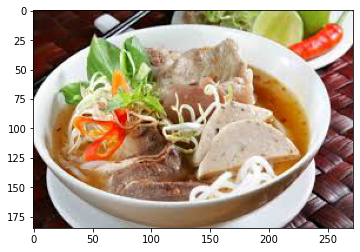

In [60]:
plt.imshow(plt.imread('/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam/bun bo/images (1).jpg'))

In [61]:
path = '/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam'
data_dir = pathlib.Path(path)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam')

In [63]:
labels = ['chao luon', 'bun bo', 'bun cha', 'bun dau mam tom', 'bun rieu','banh xeo','bun thit nuong']
col_to_title = {'chao luon': 'chao luon', 'bun bo': 'bun bo', 'bun dau mam tom': 'bun dau mam tom','banh xeo': 'banh xeo','ca kho to': 'ca kho to'}

In [66]:
monanvietnam_folder = '/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam'
monanvietnam_folder

'/content/drive/MyDrive/Colab Notebooks/BTND/mon an vietnam'

In [67]:
x_train = image_dataset_from_directory(monanvietnam_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)
x_test = image_dataset_from_directory(monanvietnam_folder,validation_split=0.3,subset="validation",seed=2210,image_size=(128,128),batch_size=32)

Found 49 files belonging to 5 classes.
Using 14 files for validation.
Found 49 files belonging to 5 classes.
Using 14 files for validation.


In [69]:
class_name=x_train.class_names
class_name

['Ca kho to', 'banh xeo', 'bun bo', 'bun dau mam tom', 'chao luon']

In [71]:
import tensorflow as tf 
AUTOTUNE = tf.data.AUTOTUNE
x_train = x_train.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)
x_test = x_test.cache().shuffle(buffer_size=1000).prefetch(buffer_size=AUTOTUNE)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation=Sequential( [ layers.RandomFlip(mode='horizontal',input_shape=(128,128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)],name='data_augmentation_layer')
num_classes=len(class_name)
num_classes

5

In [75]:
model=Sequential([ data_layer,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [76]:
model=Sequential([data_augmentation,
    
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=num_classes)])

In [77]:
model.compile( optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation_layer (Se  (None, 128, 128, 3)      0         
 quential)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                      

In [95]:
run = model.fit(x = x_train, epochs = 500, validation_data= x_test)

Epoch 1/500
1/1 [==============================] - 0s 375ms/step - loss: 1.6934e-05 - accuracy: 1.0000 - val_loss: 8.5149e-08 - val_accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 364ms/step - loss: 1.0354e-04 - accuracy: 1.0000 - val_loss: 8.5149e-08 - val_accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 364ms/step - loss: 3.6954e-06 - accuracy: 1.0000 - val_loss: 8.5149e-08 - val_accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 365ms/step - loss: 8.1826e-06 - accuracy: 1.0000 - val_loss: 8.5149e-08 - val_accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 359ms/step - loss: 4.8194e-06 - accuracy: 1.0000 - val_loss: 8.5149e-08 - val_accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 364ms/step - loss: 1.0268e-05 - accuracy: 1.0000 - val_loss: 9.3664e-08 - val_accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 358ms/step - loss: 4.2915e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 29ms/step


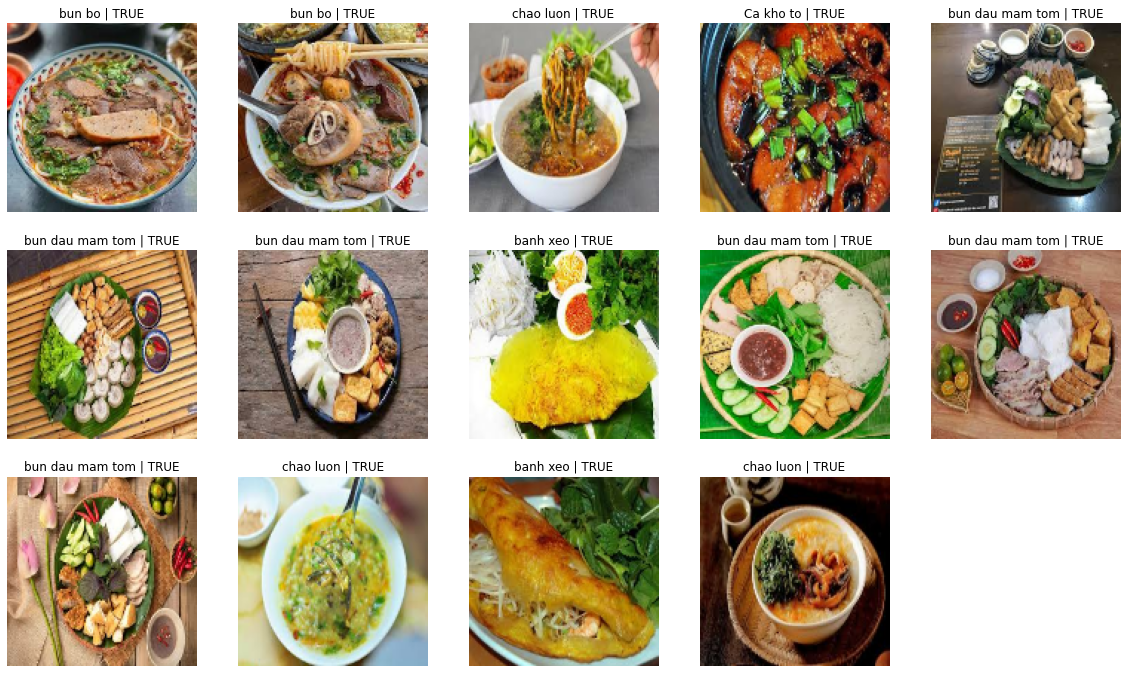

In [98]:
plt.figure(figsize=(20, 16))
class_names = ['Ca kho to','banh xeo', 'bun bo','bun dau mam tom', 'chao luon']
result = ' | FALSE'   
for images, labels in x_test.take(1):
    for i in range(14):
        ax = plt.subplot(4,5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'   
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")